# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_data = []
city_data.append({})

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print("Beginning Data Retrieval ")
print("-----------------------------")
count = 1
place = 0

for city in cities:
    print("Processing Record " + str(count) + " of " + str(len(cities)) + " | " + city)
    count += 1
    response = requests.get(query_url + city).json()
    try:
        city_data[place]['City'] = response['name']
        city_data[place]['Lat'] = response['coord']['lat']
        city_data[place]['Lng'] = response['coord']['lon']
        city_data[place]['Max Temp'] = response['main']['temp_max']
        city_data[place]['Humidity'] = response['main']['humidity']
        city_data[place]['Cloudiness'] = response['clouds']['all']
        city_data[place]['Wind Speed'] = response['wind']['speed']
        city_data[place]['Country'] = response['sys']['country']
        city_data[place]['Date'] = response['dt']  
        place += 1
        city_data.append({})
    except: 
        print("City not found. Skipping...")
city_data.pop()        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of 614 | port alfred
Processing Record 2 of 614 | torbay
Processing Record 3 of 614 | srednekolymsk
Processing Record 4 of 614 | kavaratti
Processing Record 5 of 614 | barrow
Processing Record 6 of 614 | lavrentiya
Processing Record 7 of 614 | yakovlevka
Processing Record 8 of 614 | rikitea
Processing Record 9 of 614 | lebu
Processing Record 10 of 614 | ushuaia
Processing Record 11 of 614 | kieta
Processing Record 12 of 614 | acapulco
Processing Record 13 of 614 | saint-philippe
Processing Record 14 of 614 | vaitupu
City not found. Skipping...
Processing Record 15 of 614 | qaanaaq
Processing Record 16 of 614 | colares
Processing Record 17 of 614 | atuona
Processing Record 18 of 614 | ostrovnoy
Processing Record 19 of 614 | cabimas
Processing Record 20 of 614 | bluff
Processing Record 21 of 614 | batagay-alyta
Processing Record 22 of 614 | cascavel
Processing Record 23 of 614 | bredasdorp
Processing Record 24 of

Processing Record 194 of 614 | guiratinga
Processing Record 195 of 614 | tumannyy
City not found. Skipping...
Processing Record 196 of 614 | ponta do sol
Processing Record 197 of 614 | cartagena
Processing Record 198 of 614 | warmbad
Processing Record 199 of 614 | pevek
Processing Record 200 of 614 | cairns
Processing Record 201 of 614 | sur
Processing Record 202 of 614 | nabire
Processing Record 203 of 614 | pudozh
Processing Record 204 of 614 | eyl
Processing Record 205 of 614 | arlit
Processing Record 206 of 614 | bitung
Processing Record 207 of 614 | cidreira
Processing Record 208 of 614 | port elizabeth
Processing Record 209 of 614 | vilhena
Processing Record 210 of 614 | callaway
Processing Record 211 of 614 | svirstroy
Processing Record 212 of 614 | karatuzskoye
Processing Record 213 of 614 | alice springs
Processing Record 214 of 614 | te anau
Processing Record 215 of 614 | teguldet
Processing Record 216 of 614 | pundaguitan
Processing Record 217 of 614 | laguna
Processing Reco

Processing Record 389 of 614 | sorland
Processing Record 390 of 614 | coihaique
Processing Record 391 of 614 | peniche
Processing Record 392 of 614 | japura
Processing Record 393 of 614 | nuuk
Processing Record 394 of 614 | astorga
Processing Record 395 of 614 | mayo
Processing Record 396 of 614 | castro
Processing Record 397 of 614 | wattegama
Processing Record 398 of 614 | maine-soroa
Processing Record 399 of 614 | kununurra
Processing Record 400 of 614 | vostok
Processing Record 401 of 614 | adet
Processing Record 402 of 614 | hervey bay
Processing Record 403 of 614 | vasilsursk
Processing Record 404 of 614 | vila
Processing Record 405 of 614 | pangody
Processing Record 406 of 614 | addi ugri
City not found. Skipping...
Processing Record 407 of 614 | ilhabela
Processing Record 408 of 614 | mahebourg
Processing Record 409 of 614 | pisco
Processing Record 410 of 614 | bilma
Processing Record 411 of 614 | tshela
Processing Record 412 of 614 | tralee
Processing Record 413 of 614 | zhouc

Processing Record 583 of 614 | fuyu
Processing Record 584 of 614 | rocha
Processing Record 585 of 614 | rameswaram
Processing Record 586 of 614 | hasaki
Processing Record 587 of 614 | novobelokatay
Processing Record 588 of 614 | makungu
Processing Record 589 of 614 | poso
Processing Record 590 of 614 | comodoro rivadavia
Processing Record 591 of 614 | monrovia
Processing Record 592 of 614 | canaries
Processing Record 593 of 614 | turbat
Processing Record 594 of 614 | abha
Processing Record 595 of 614 | foix
Processing Record 596 of 614 | tromso
Processing Record 597 of 614 | bairiki
Processing Record 598 of 614 | visby
Processing Record 599 of 614 | katerero
Processing Record 600 of 614 | waingapu
Processing Record 601 of 614 | saint-pierre
Processing Record 602 of 614 | nortelandia
Processing Record 603 of 614 | marsh harbour
Processing Record 604 of 614 | tetouan
Processing Record 605 of 614 | louisbourg
City not found. Skipping...
Processing Record 606 of 614 | ulladulla
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.59,26.89,63.00,82,41,4.00,ZA,1592321375
1,Torbay,47.67,-52.73,66.99,55,20,11.41,CA,1592321375
2,Srednekolymsk,67.45,153.68,70.03,43,65,6.82,RU,1592321380
3,Kavaratti,10.57,72.64,84.81,78,100,18.66,IN,1592321456
4,Barrow,71.29,-156.79,35.60,80,75,12.75,US,1592321194
...,...,...,...,...,...,...,...,...,...
558,Kikwit,-5.04,18.82,85.39,35,0,2.77,CD,1592321527
559,Aklavik,68.22,-135.01,57.20,82,90,3.36,CA,1592321527
560,Angoche,-16.23,39.91,70.84,84,99,12.33,MZ,1592321527
561,Andahuaylas,-13.66,-73.39,61.32,48,29,5.82,PE,1592321527


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
#humid_cities_df = city_data_df.loc[city_data_df['Humidity'] > 100]
indices = city_data_df.index[city_data_df['Humidity'] > 100].tolist()

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(indices, inplace=False)

In [10]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

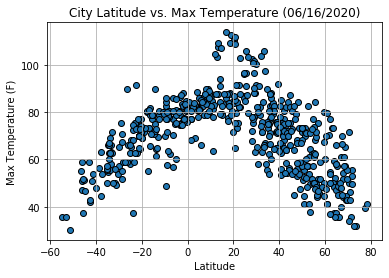

In [11]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values,y_values, edgecolor='black')
plt.title('City Latitude vs. Max Temperature (' + time.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('output_data/LatvTemp.png')
plt.show()

# This code plots city latitude vs. max temperature on a scatter plot.
# The resulting scatter plot shows a general trend of warmer temperatures closer to 0 latitude, and colder temperatures further away from 0 latitude. 

## Latitude vs. Humidity Plot

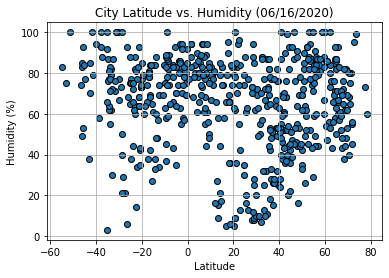

In [12]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values, edgecolor='black')
plt.title('City Latitude vs. Humidity (' + time.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('output_data/LatvHum.png')
plt.show()

# This code plots city latitude vs. humidity on a scatter plot.
# The resulting scatter plot shows a slight trend of higher humidity for latitudes furthest away from 0.  

## Latitude vs. Cloudiness Plot

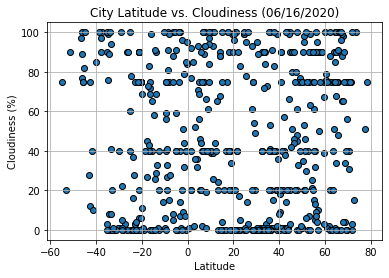

In [13]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values, edgecolor='black')
plt.title('City Latitude vs. Cloudiness (' + time.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('output_data/LatvCloud.png')
plt.show()

# This code plots city latitude vs. cloudiness on a scatter plot.
# The resulting scatter plot doesn't appear to show any trend for cloudiness based on latitude. 

## Latitude vs. Wind Speed Plot

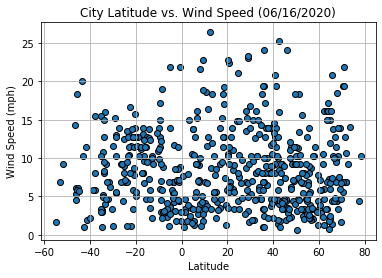

In [14]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values, edgecolor='black')
plt.title('City Latitude vs. Wind Speed (' + time.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('output_data/LatvWind.png')
plt.show()

# This code plots city latitude vs. wind speed on a scatter plot.
# The resulting scatter plot doesn't appear indicate any trend for wind speed based on latitude, but does show most speeds across all latitudes are below 20mph.

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression(x_values, y_values, x_label, y_label):
    # Perform a linear regression on x vs. y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(round(x_values.median(),2),round(intercept,2)),fontsize=15,color="red")

    # Print r square value
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi = clean_city_data[clean_city_data['Lat'] >= 0]
southern_hemi = clean_city_data[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5366215609918066


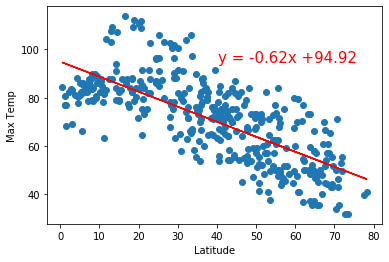

In [17]:
regression(northern_hemi['Lat'], northern_hemi['Max Temp'], 'Latitude', 'Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5948435564502317


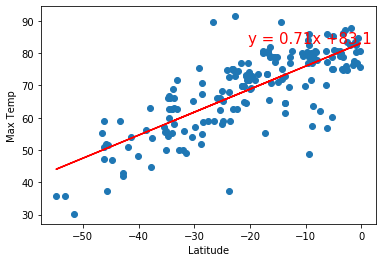

In [18]:
regression(southern_hemi['Lat'], southern_hemi['Max Temp'], 'Latitude', 'Max Temp')

#The regression lines show a negative trend for max temperature as latitude increases in northern hemisphere, and positive trend as latitude increases in southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0017629248112406707


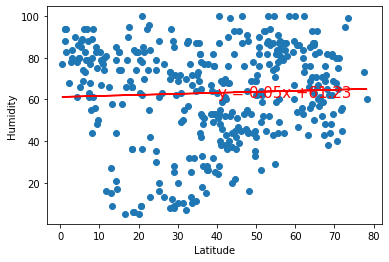

In [19]:
regression(northern_hemi['Lat'], northern_hemi['Humidity'], 'Latitude', 'Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 2.1493776801615967e-05


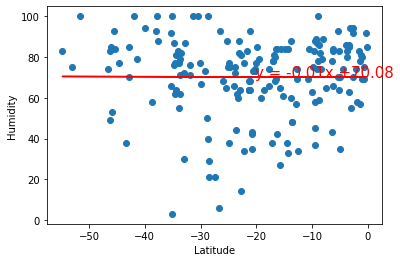

In [20]:
regression(southern_hemi['Lat'], southern_hemi['Humidity'], 'Latitude', 'Humidity')

#The regression lines show a very slight positive trend for humidity as latitude increases in northern hemisphere, and slight negative trend as latitude increases in southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0020314363648905515


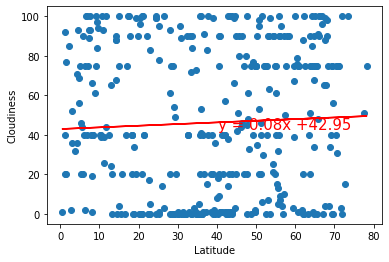

In [21]:
regression(northern_hemi['Lat'], northern_hemi['Cloudiness'], 'Latitude', 'Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0016600107612161853


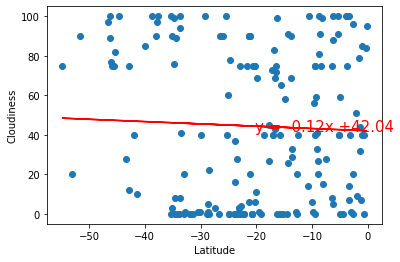

In [22]:
regression(southern_hemi['Lat'], southern_hemi['Cloudiness'], 'Latitude', 'Cloudiness')

#The regression lines show little to no positive trend for cloudiness as latitude increases in northern hemisphere, and little to now negative trend as latitude increases in southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0011092699846539224


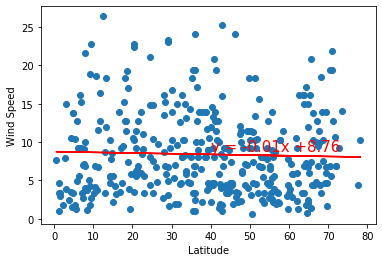

In [23]:
regression(northern_hemi['Lat'], northern_hemi['Wind Speed'], 'Latitude', 'Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00030599414076389145


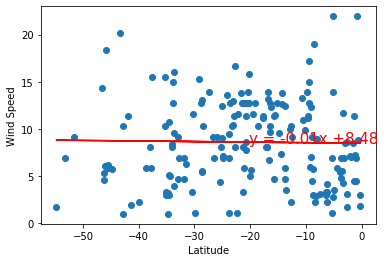

In [24]:
regression(southern_hemi['Lat'], southern_hemi['Wind Speed'], 'Latitude', 'Wind Speed')

#The regression lines show little to no trend for humidity as latitude increases in northern hemisphere, and similar trend as latitude increases in southern hemisphere.